# Examples of the pyrankability package

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np
import copy
import os

In [3]:
import sys
sys.path.insert(0,".")

In [4]:
import pyrankability

## Simple examples

In [5]:
n=8
D=np.zeros((n,n))
D[np.triu_indices(n,1)]=1
D[[5,3,7]] = 1-D[[5,3,7]]
D

array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

### Hillside

In [6]:
k_hillside,details_hillside = pyrankability.hillside.bilp(D)
k_hillside

Academic license - for non-commercial use only


54

In [7]:
details_hillside['P']

[(0, 7, 1, 5, 2, 4, 3, 6)]

### LOP

In [8]:
k_lop,details_lop = pyrankability.lop.bilp(D)
k_lop

25.0

In [9]:
details_lop['P']

[(7, 0, 1, 2, 4, 6, 5, 3)]

### Multiple solutions with random restarts

In [10]:
k_hillside_10,details_hillside_10 = pyrankability.hillside.bilp(D,num_random_restarts=10)
k_hillside_10

Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpyd7enj5k/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

54

In [11]:
details_hillside_10['P']

[(0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 3, 4, 6),
 (0, 1, 7, 5, 2, 3, 4, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 3, 4, 6),
 (0, 1, 7, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 1, 7, 5, 2, 3, 4, 6)]

In [12]:
k_lop_10,details_lop_10 = pyrankability.lop.bilp(D,num_random_restarts=10)
k_lop_10

Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg6vngqow/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

25.0

In [14]:
details_lop_10['P']

[(7, 0, 1, 2, 4, 6, 5, 3),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6)]

### Multiple solutions with pairs

In [16]:
k_hillside_10_paired,details_hillside_10_paired = pyrankability.hillside.bilp(D,num_random_restarts=10,find_pair=True)
k_hillside_10_paired

Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp5n4z0h6s/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

54.0

In [17]:
details_hillside_10_paired.keys()

dict_keys(['Pfirst', 'P', 'x', 'objs', 'xs', 'pair_details'])

If you want to check out the second pair:

In [19]:
details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]

((0, 1, 7, 2, 5, 4, 3, 6), (0, 7, 1, 5, 2, 3, 4, 6))

Visualize it

/data/env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


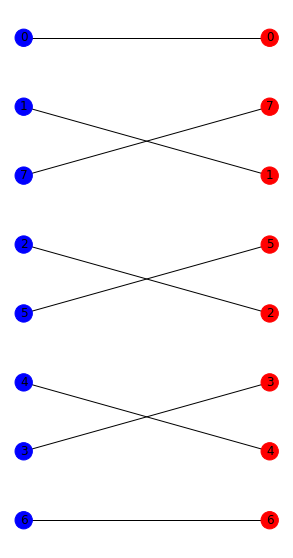

In [20]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]))

In [23]:
k_lop_10_paired,details_lop_10_paired = pyrankability.lop.bilp(D,num_random_restarts=10,find_pair=True)
k_lop_10_paired

Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2wd_2xe8/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

25.0

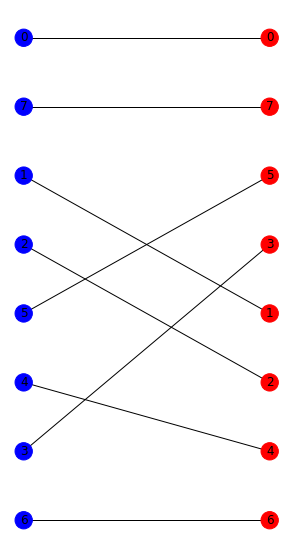

In [25]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_lop_10_paired['P'][1],details_lop_10_paired['pair_details']['P'][1]))